In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('nc_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_cases_1 lag', 'new_cases_4_lag', 'new_cases_7_lag', 'new_deaths_7_lag', 'minimum_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_mean', 'new_deaths_50_std', 'new_cases_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_50_mean', 'new_hospitalized_patients', 'new_cases_100_mean', 'new_cases_10_max', 'new_deaths_1_lag', 'new_cases_50_lag', 'new_cases_3_lag']]
covid_test = covid_test[['y', 'new_cases_1 lag', 'new_cases_4_lag', 'new_cases_7_lag', 'new_deaths_7_lag', 'minimum_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_mean', 'new_deaths_50_std', 'new_cases_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_deaths_50_mean', 'new_hospitalized_patients', 'new_cases_100_mean', 'new_cases_10_max', 'new_deaths_1_lag', 'new_cases_50_lag', 'new_cases_3_lag']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4116.48961	validation_1-rmse:18999.54042
[1]	validation_0-rmse:4081.05215	validation_1-rmse:18952.50638
[2]	validation_0-rmse:4045.97056	validation_1-rmse:18905.95907
[3]	validation_0-rmse:4011.24159	validation_1-rmse:18859.89071
[4]	validation_0-rmse:3976.86200	validation_1-rmse:18814.29193
[5]	validation_0-rmse:3942.86814	validation_1-rmse:18772.97042
[6]	validation_0-rmse:3909.00336	validation_1-rmse:18720.17322
[7]	validation_0-rmse:3875.47801	validation_1-rmse:18667.89990
[8]	validation_0-rmse:3842.28907	validation_1-rmse:18616.14977
[9]	validation_0-rmse:3809.43342	validation_1-rmse:18564.90911
[10]	validation_0-rmse:3776.90167	validation_1-rmse:18522.62931
[11]	validation_0-rmse:3744.69548	validation_1-rmse:18480.81268
[12]	validation_0-rmse:3712.81108	validation_1-rmse:18439.40438
[13]	validation_0-rmse:3681.24543	validation_1-rmse:18398.44671
[14]	validation_0-rmse:3649.99407	validation_1-rmse:18357.97518
[15]	validation_0-rmse:3619.05493	validation_1-rms

[128]	validation_0-rmse:1472.55104	validation_1-rmse:14982.99608
[129]	validation_0-rmse:1461.77249	validation_1-rmse:14965.95269
[130]	validation_0-rmse:1451.20982	validation_1-rmse:14949.52905
[131]	validation_0-rmse:1440.76533	validation_1-rmse:14933.32030
[132]	validation_0-rmse:1430.27709	validation_1-rmse:14917.04004
[133]	validation_0-rmse:1420.04366	validation_1-rmse:14901.11107
[134]	validation_0-rmse:1410.03438	validation_1-rmse:14881.98282
[135]	validation_0-rmse:1399.97265	validation_1-rmse:14866.41192
[136]	validation_0-rmse:1389.82909	validation_1-rmse:14850.46143
[137]	validation_0-rmse:1379.97643	validation_1-rmse:14835.17316
[138]	validation_0-rmse:1370.34402	validation_1-rmse:14816.54647
[139]	validation_0-rmse:1360.65291	validation_1-rmse:14801.61050
[140]	validation_0-rmse:1351.20544	validation_1-rmse:14783.52368
[141]	validation_0-rmse:1341.64681	validation_1-rmse:14768.78475
[142]	validation_0-rmse:1332.25317	validation_1-rmse:14754.23825
[143]	validation_0-rmse:1

[256]	validation_0-rmse:653.05083	validation_1-rmse:13522.81698
[257]	validation_0-rmse:649.47537	validation_1-rmse:13515.11214
[258]	validation_0-rmse:645.96990	validation_1-rmse:13507.50821
[259]	validation_0-rmse:642.60174	validation_1-rmse:13499.95616
[260]	validation_0-rmse:639.25529	validation_1-rmse:13492.48479
[261]	validation_0-rmse:635.96850	validation_1-rmse:13485.09475
[262]	validation_0-rmse:632.66508	validation_1-rmse:13477.76808
[263]	validation_0-rmse:629.27031	validation_1-rmse:13470.53139
[264]	validation_0-rmse:625.86015	validation_1-rmse:13463.36149
[265]	validation_0-rmse:622.65439	validation_1-rmse:13456.25206
[266]	validation_0-rmse:619.21972	validation_1-rmse:13449.22841
[267]	validation_0-rmse:616.03539	validation_1-rmse:13442.29536
[268]	validation_0-rmse:612.70462	validation_1-rmse:13435.40911
[269]	validation_0-rmse:609.36029	validation_1-rmse:13428.60445
[270]	validation_0-rmse:606.07453	validation_1-rmse:13421.88626
[271]	validation_0-rmse:602.77762	valida

[385]	validation_0-rmse:373.13710	validation_1-rmse:13050.57550
[386]	validation_0-rmse:371.92166	validation_1-rmse:13048.75515
[387]	validation_0-rmse:370.65041	validation_1-rmse:13046.94804
[388]	validation_0-rmse:369.45307	validation_1-rmse:13045.16105
[389]	validation_0-rmse:368.19560	validation_1-rmse:13043.37247
[390]	validation_0-rmse:367.01942	validation_1-rmse:13041.61307
[391]	validation_0-rmse:365.79623	validation_1-rmse:13039.85867
[392]	validation_0-rmse:364.54853	validation_1-rmse:13038.11272
[393]	validation_0-rmse:363.34358	validation_1-rmse:13036.39654
[394]	validation_0-rmse:362.13396	validation_1-rmse:13034.67863
[395]	validation_0-rmse:360.94212	validation_1-rmse:13032.98259
[396]	validation_0-rmse:359.76126	validation_1-rmse:13031.30758
[397]	validation_0-rmse:358.58100	validation_1-rmse:13029.62990
[398]	validation_0-rmse:357.39933	validation_1-rmse:13027.97237
[399]	validation_0-rmse:356.24759	validation_1-rmse:13026.33712
[400]	validation_0-rmse:355.07913	valida

[514]	validation_0-rmse:263.45251	validation_1-rmse:12901.49382
[515]	validation_0-rmse:262.83568	validation_1-rmse:12900.81295
[516]	validation_0-rmse:262.15758	validation_1-rmse:12900.13500
[517]	validation_0-rmse:261.55942	validation_1-rmse:12899.46167
[518]	validation_0-rmse:260.92643	validation_1-rmse:12898.80290
[519]	validation_0-rmse:260.43394	validation_1-rmse:12898.14000
[520]	validation_0-rmse:260.00037	validation_1-rmse:12897.48933
[521]	validation_0-rmse:259.34078	validation_1-rmse:12896.82759
[522]	validation_0-rmse:258.72433	validation_1-rmse:12896.18737
[523]	validation_0-rmse:258.09959	validation_1-rmse:12895.54950
[524]	validation_0-rmse:257.37155	validation_1-rmse:12894.90585
[525]	validation_0-rmse:256.80442	validation_1-rmse:12894.27011
[526]	validation_0-rmse:256.19580	validation_1-rmse:12893.64638
[527]	validation_0-rmse:255.62477	validation_1-rmse:12893.02018
[528]	validation_0-rmse:255.02736	validation_1-rmse:12892.40139
[529]	validation_0-rmse:254.47907	valida

[643]	validation_0-rmse:209.69291	validation_1-rmse:12846.71940
[644]	validation_0-rmse:209.37727	validation_1-rmse:12846.71091
[645]	validation_0-rmse:209.19043	validation_1-rmse:12846.43056
[646]	validation_0-rmse:208.93433	validation_1-rmse:12846.13652
[647]	validation_0-rmse:208.47990	validation_1-rmse:12846.11312
[648]	validation_0-rmse:208.30244	validation_1-rmse:12845.83745
[649]	validation_0-rmse:208.14466	validation_1-rmse:12845.56385
[650]	validation_0-rmse:207.85975	validation_1-rmse:12845.55973
[651]	validation_0-rmse:207.68727	validation_1-rmse:12845.28898
[652]	validation_0-rmse:207.24214	validation_1-rmse:12845.26670
[653]	validation_0-rmse:207.01708	validation_1-rmse:12845.00014
[654]	validation_0-rmse:206.71713	validation_1-rmse:12844.99245
[655]	validation_0-rmse:206.56462	validation_1-rmse:12844.72623
[656]	validation_0-rmse:206.28989	validation_1-rmse:12844.72193
[657]	validation_0-rmse:206.04891	validation_1-rmse:12844.44554
[658]	validation_0-rmse:205.61339	valida

[772]	validation_0-rmse:180.66958	validation_1-rmse:12831.57201
[773]	validation_0-rmse:180.37915	validation_1-rmse:12831.43519
[774]	validation_0-rmse:180.16088	validation_1-rmse:12831.43173
[775]	validation_0-rmse:180.05548	validation_1-rmse:12831.30259
[776]	validation_0-rmse:179.97294	validation_1-rmse:12831.17346
[777]	validation_0-rmse:179.77388	validation_1-rmse:12831.16942
[778]	validation_0-rmse:179.54552	validation_1-rmse:12831.03863
[779]	validation_0-rmse:179.33188	validation_1-rmse:12831.03582
[780]	validation_0-rmse:179.17407	validation_1-rmse:12830.91002
[781]	validation_0-rmse:179.09521	validation_1-rmse:12830.90638
[782]	validation_0-rmse:178.87162	validation_1-rmse:12830.78035
[783]	validation_0-rmse:178.61202	validation_1-rmse:12830.77970
[784]	validation_0-rmse:178.45362	validation_1-rmse:12830.66246
[785]	validation_0-rmse:178.25992	validation_1-rmse:12830.65891
[786]	validation_0-rmse:178.10242	validation_1-rmse:12830.53922
[787]	validation_0-rmse:177.85228	valida

[901]	validation_0-rmse:155.39769	validation_1-rmse:12823.64910
[902]	validation_0-rmse:155.12928	validation_1-rmse:12823.70105
[903]	validation_0-rmse:154.98108	validation_1-rmse:12823.62991
[904]	validation_0-rmse:154.79964	validation_1-rmse:12823.40991
[905]	validation_0-rmse:154.52248	validation_1-rmse:12823.07858
[906]	validation_0-rmse:154.30412	validation_1-rmse:12823.08043
[907]	validation_0-rmse:154.03904	validation_1-rmse:12823.13883
[908]	validation_0-rmse:153.79082	validation_1-rmse:12823.13419
[909]	validation_0-rmse:153.61343	validation_1-rmse:12822.91787
[910]	validation_0-rmse:153.35139	validation_1-rmse:12822.95646
[911]	validation_0-rmse:153.23381	validation_1-rmse:12822.88673
[912]	validation_0-rmse:153.11936	validation_1-rmse:12822.88360
[913]	validation_0-rmse:152.84916	validation_1-rmse:12822.45311
[914]	validation_0-rmse:152.63674	validation_1-rmse:12822.45498
[915]	validation_0-rmse:152.25504	validation_1-rmse:12822.42321
[916]	validation_0-rmse:152.08273	valida

[1029]	validation_0-rmse:129.17132	validation_1-rmse:12817.59563
[1030]	validation_0-rmse:128.95200	validation_1-rmse:12817.43563
[1031]	validation_0-rmse:128.69409	validation_1-rmse:12817.22582
[1032]	validation_0-rmse:128.47719	validation_1-rmse:12817.24772
[1033]	validation_0-rmse:128.38932	validation_1-rmse:12817.24547
[1034]	validation_0-rmse:128.17139	validation_1-rmse:12817.26283
[1035]	validation_0-rmse:127.89370	validation_1-rmse:12817.16703
[1036]	validation_0-rmse:127.67518	validation_1-rmse:12817.17119
[1037]	validation_0-rmse:127.35151	validation_1-rmse:12817.21521
[1038]	validation_0-rmse:127.15612	validation_1-rmse:12817.24520
[1039]	validation_0-rmse:127.00704	validation_1-rmse:12817.08212
[1040]	validation_0-rmse:126.81123	validation_1-rmse:12816.93157
[1041]	validation_0-rmse:126.72162	validation_1-rmse:12816.92387
[1042]	validation_0-rmse:126.52029	validation_1-rmse:12816.97014
[1043]	validation_0-rmse:126.19573	validation_1-rmse:12817.02337
[1044]	validation_0-rmse:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

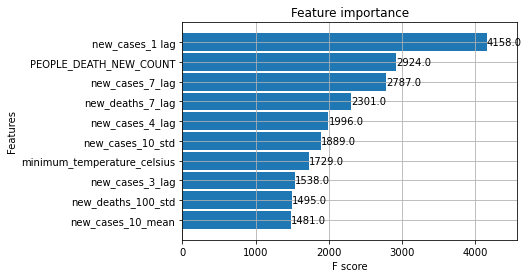

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

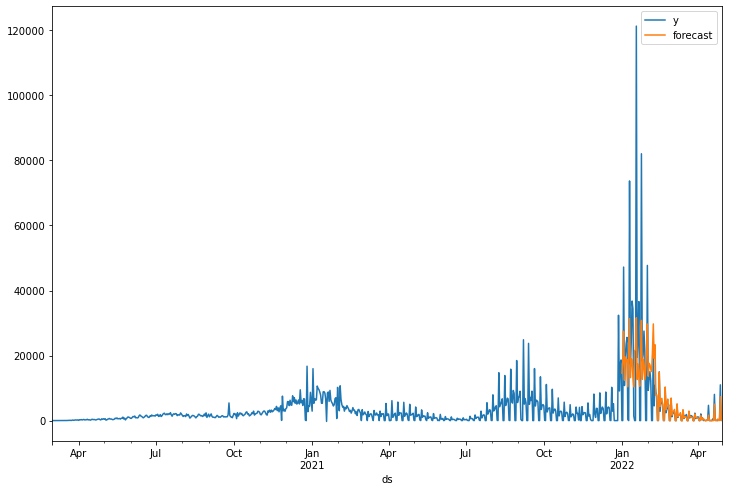

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

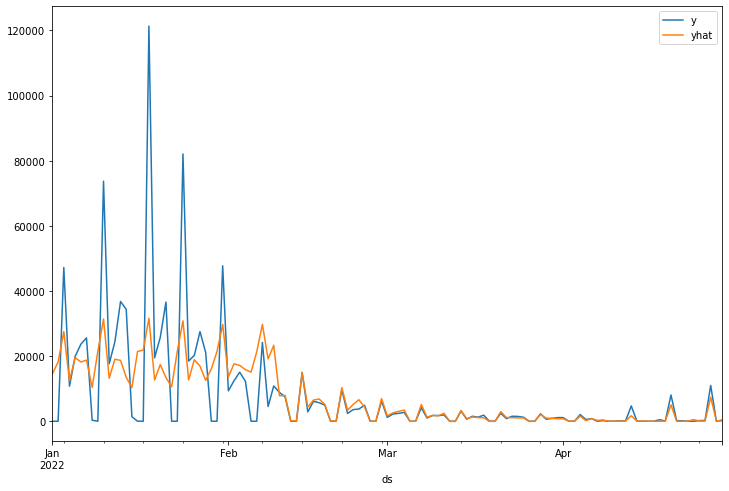

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  12816.92378214989
Test MAE:  5495.186001372938
MASE =  0.5905578676865887


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

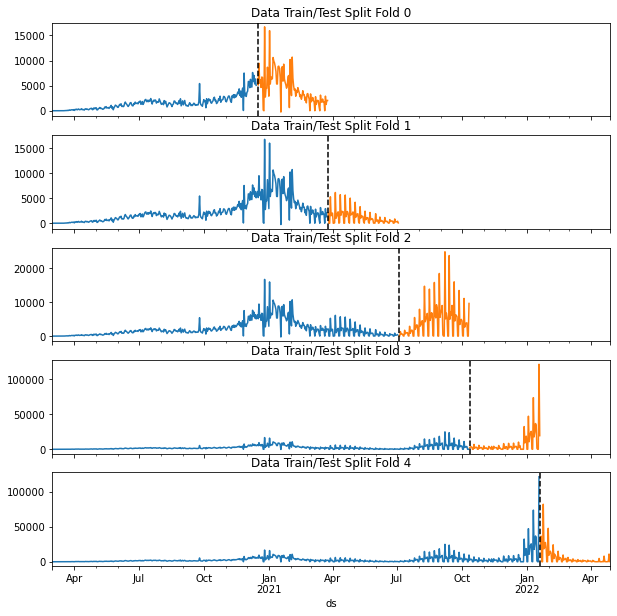

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[01:12:09] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4118.03509	validation_1-rmse:19000.01782
[100]	validation_0-rmse:2004.64879	validation_1-rmse:15665.35336
[200]	validation_0-rmse:1198.65089	validation_1-rmse:14413.86302
[300]	validation_0-rmse:890.38813	validation_1-rmse:13665.72299
[400]	validation_0-rmse:753.03998	validation_1-rmse:13332.05790
[500]	validation_0-rmse:675.99777	validation_1-rmse:13157.16290
[600]	validation_0-rmse:618.79373	validation_1-rmse:13054.32215
[700]	validation_0-rmse:577.84654	validation_1-rmse:13013.16890
[800]	validation_0-rmse:544.28360	validation_1-rmse:13004.78457
[845]	validation_0-rmse:530.79411	validation_1-rmse:13003.64653
[01:12:10] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	valid

<AxesSubplot:xlabel='ds'>

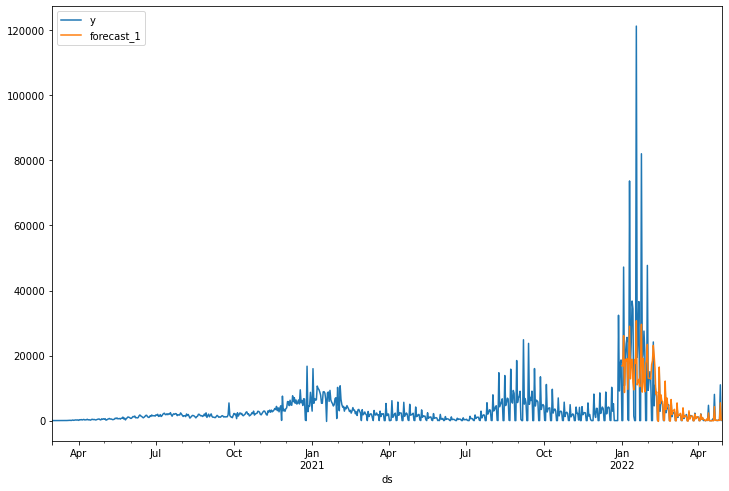

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

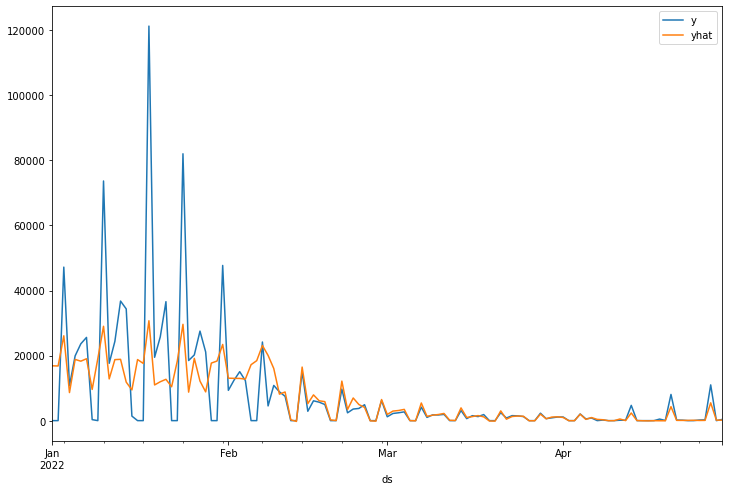

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  12816.92378214989
Test MAE:  5495.186001372938
MASE =  0.5905578676865887
